In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
m_path = "men_highest_school_level_attended_averages.csv"
w_path = "women_highest_school_level_attended_averages.csv"
m_dataset = pd.read_csv(m_path)
w_dataset = pd.read_csv(w_path)
# women_dataset = pd.read_excel(path)
# path_2 = "./../MICS6_2019_Stats Day Competition/Datasets/hh_Household_Stat_Day.xlsx"
# household_dataset = pd.read_excel(path_2)

In [25]:
w_dataset.rename(columns={"urban_women_averages": "urban_women",
                 "rural_women_averages": "rural_women"}, inplace=True)
w_dataset

,school_level,urban_women,rural_women
0,nursery,0.000000,0.001223
1,primary,0.064080,0.125948
2,lower secondary,0.159906,0.233798
3,higher secondary,0.562610,0.520910
4,higher,0.211052,0.115187
5,don't know,0.002352,0.002935


In [33]:
w_df = w_dataset.melt(id_vars=["school_level"])

In [28]:
m_dataset.rename(columns={"urban_men_averages": "urban_men",
                 "rural_men_averages": "rural_men"}, inplace=True)
m_dataset

,school_level,urban_men,rural_men
0,nursery,0.000000,0.004302
1,primary,0.093236,0.160418
2,lower secondary,0.215722,0.257529
3,higher secondary,0.502742,0.458513
4,higher,0.180987,0.114935
5,don't know,0.007313,0.004302


In [32]:
m_df = m_dataset.melt(id_vars=["school_level"])

In [38]:
final_df = pd.concat([m_df, w_df], ignore_index=True)
final_df.rename(columns={"variable": "area_gender",
                "value": "area_average"}, inplace=True)
final_df

,school_level,area_gender,area_average
0,nursery,urban_men,0.000000
1,primary,urban_men,0.093236
2,lower secondary,urban_men,0.215722
3,higher secondary,urban_men,0.502742
4,higher,urban_men,0.180987
5,don't know,urban_men,0.007313
6,nursery,rural_men,0.004302
7,primary,rural_men,0.160418
8,lower secondary,rural_men,0.257529
9,higher secondary,rural_men,0.458513


In [50]:
final_df["area"] = final_df.apply(
    lambda x: x["area_gender"].split("_")[0], axis=1)
final_df["gender"] = final_df.apply(
    lambda x: x["area_gender"].split("_")[1], axis=1)
final_df

,school_level,area_gender,area_average,area,gender
0,nursery,urban_men,0.000000,urban,men
1,primary,urban_men,0.093236,urban,men
2,lower secondary,urban_men,0.215722,urban,men
3,higher secondary,urban_men,0.502742,urban,men
4,higher,urban_men,0.180987,urban,men
5,don't know,urban_men,0.007313,urban,men
6,nursery,rural_men,0.004302,rural,men
7,primary,rural_men,0.160418,rural,men
8,lower secondary,rural_men,0.257529,rural,men
9,higher secondary,rural_men,0.458513,rural,men


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


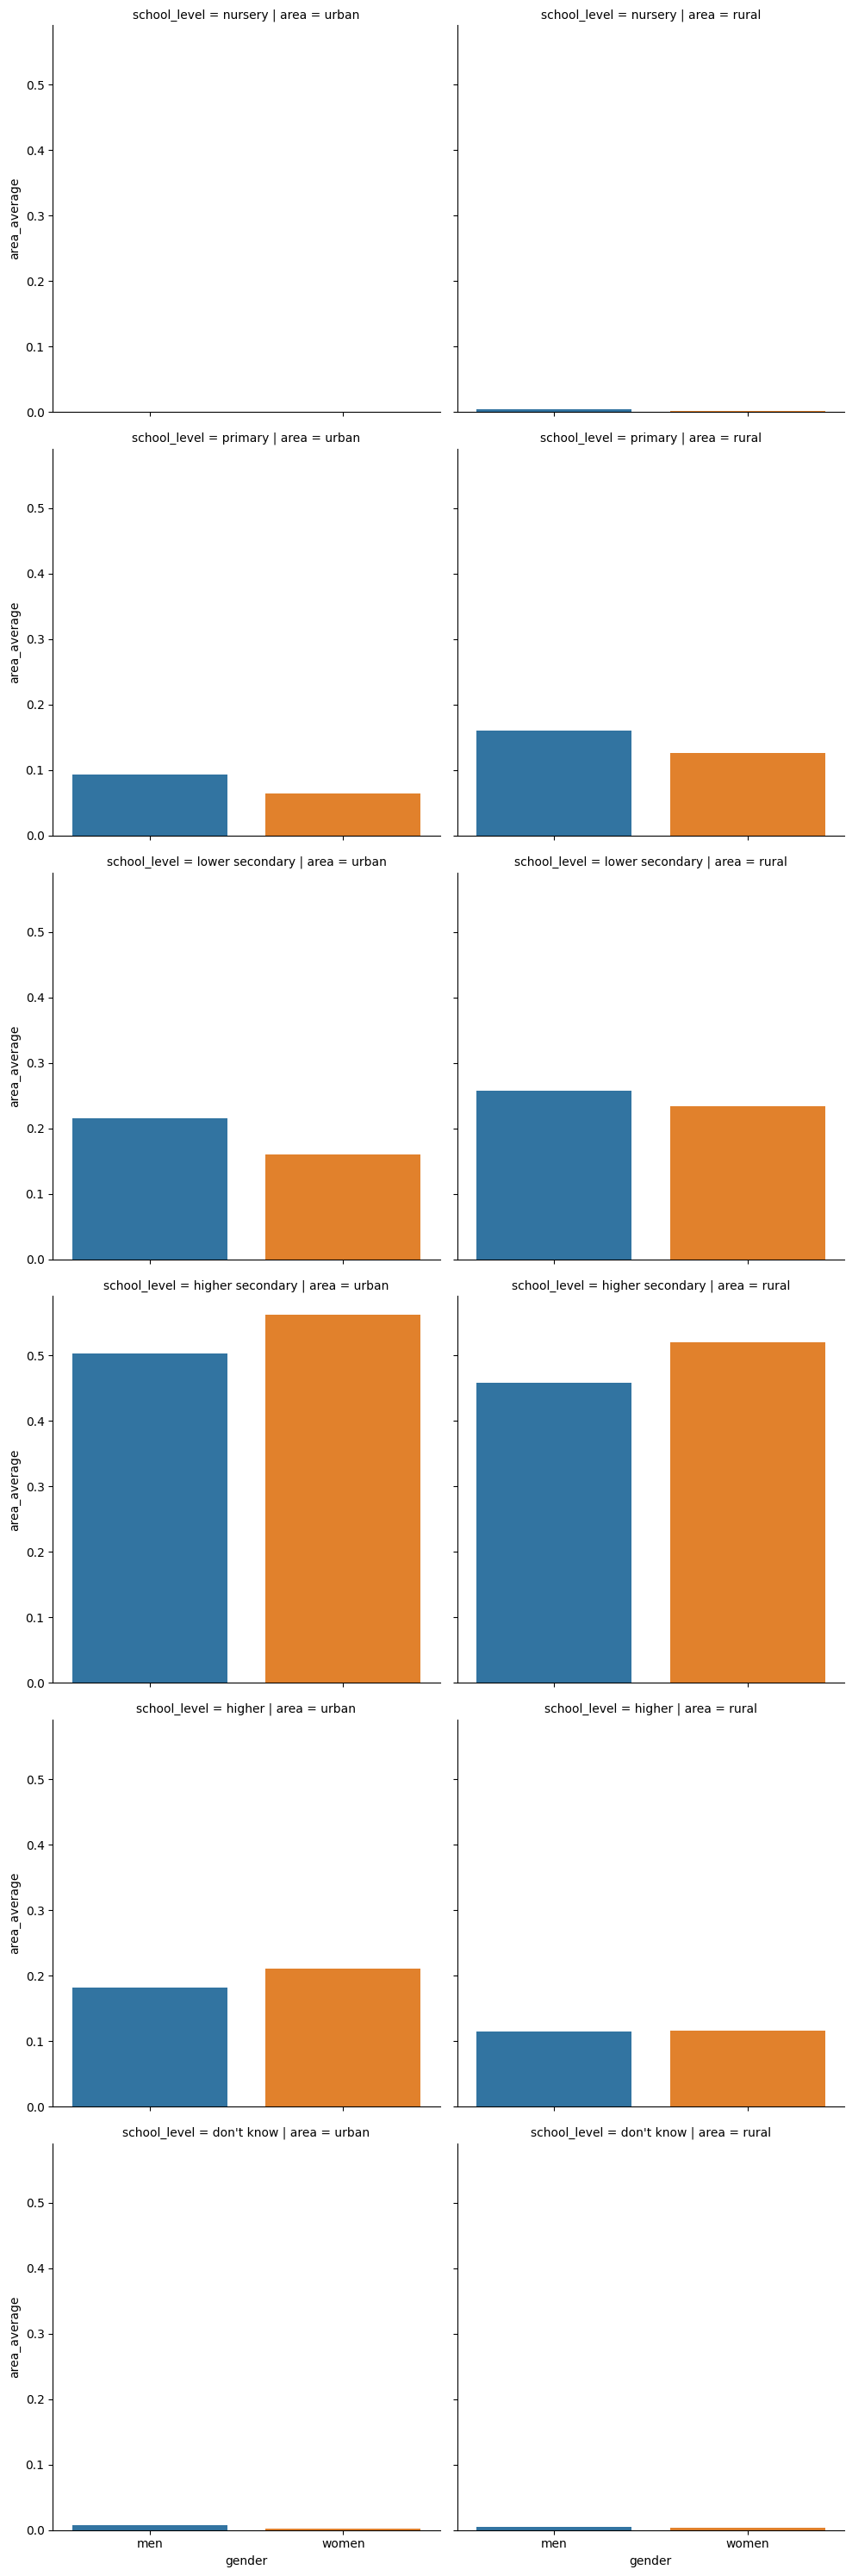

In [53]:
sns.catplot(
    data=final_df,
    col="area",
    row="school_level",
    y="area_average",
    x="gender",
    kind="bar",
)

<Figure size 1200x600 with 0 Axes>

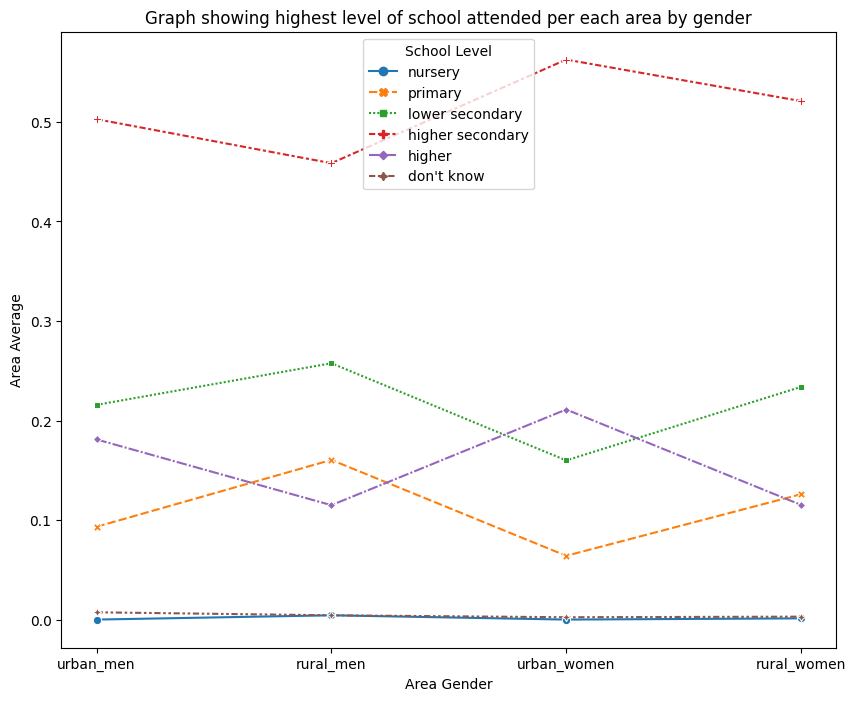

<Figure size 1200x600 with 0 Axes>

In [83]:
plt.figure(figsize=(10, 8))
sns.lineplot(
    data=final_df,
    x="area_gender",
    y="area_average",
    hue="school_level",
    style="school_level",
    markers=True,
    legend=True
)

plt.legend(title="School Level")
plt.title("Graph showing highest level of school attended per each area by gender")
plt.xlabel("Area Gender")
plt.ylabel("Area Average")
plt.figure(figsize=(12, 6))

# plt.legend(loc="center right", labels=["lol"])